# KNN

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data=sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
data['species']=data['species'].astype('category')
data['species']=data['species'].cat.codes

In [8]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
x=data.drop(columns='species')
y=data['species']

In [10]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int8

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [23]:
x_train[:10]

,sepal_length,sepal_width,petal_length,petal_width
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4
39,5.1,3.4,1.5,0.2
36,5.5,3.5,1.3,0.2
117,7.7,3.8,6.7,2.2
139,6.9,3.1,5.4,2.1
107,7.3,2.9,6.3,1.8


In [25]:
y_train[:10]

118    2
18     0
4      0
45     0
59     1
39     0
36     0
117    2
139    2
107    2
Name: species, dtype: int8

In [26]:
y_pred=model.predict(x_train)
y_pred[:10]

array([2, 0, 0, 0, 1, 0, 0, 2, 2, 2], dtype=int8)

In [27]:
model.score(x_train,y_pred)

1.0

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
cm=(confusion_matrix(y_train,y_pred))
print(cm)

[[36  0  0]
 [ 0 28  4]
 [ 0  1 36]]


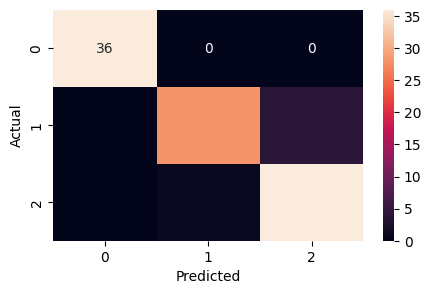

In [32]:
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
print("classification report:-")
print(classification_report(y_train,y_pred))

classification report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.88      0.92        32
           2       0.90      0.97      0.94        37

    accuracy                           0.95       105
   macro avg       0.96      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105



In [33]:
x_test[:5]

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [34]:
y_test[:5]

14     0
98     1
75     1
16     0
131    2
Name: species, dtype: int8

In [35]:
y_pred_test=model.predict(x_test)
y_pred_test[:5]

array([0, 1, 1, 0, 2], dtype=int8)